In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
#!pip install yfinance

In [3]:
import yfinance as yf
stock_symbol = 'AAPL'


In [4]:
start = '2012-01-01'
end = '2022-10-08'
df = yf.download(tickers = stock_symbol, start = start, end=end )

[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,138.210007,143.070007,137.690002,142.449997,141.997284,114311700
2022-10-04,145.029999,146.220001,144.259995,146.100006,145.635681,87830100
2022-10-05,144.070007,147.380005,143.009995,146.399994,145.934723,79471000
2022-10-06,145.809998,147.539993,145.220001,145.429993,144.967804,68402200
2022-10-07,142.539993,143.100006,139.449997,140.089996,139.644775,85925600


In [6]:
df = df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500194,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706892,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839729,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819359,394024400


In [8]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


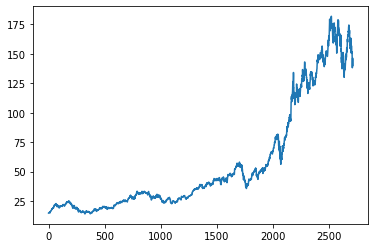

In [9]:
plt.plot(df.Close)

In [10]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
2705,138.210007,143.070007,137.690002,142.449997,114311700
2706,145.029999,146.220001,144.259995,146.100006,87830100
2707,144.070007,147.380005,143.009995,146.399994,79471000
2708,145.809998,147.539993,145.220001,145.429993,68402200


In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2705    151.3601
2706    151.3561
2707    151.3945
2708    151.3777
2709    151.3232
Name: Close, Length: 2710, dtype: float64

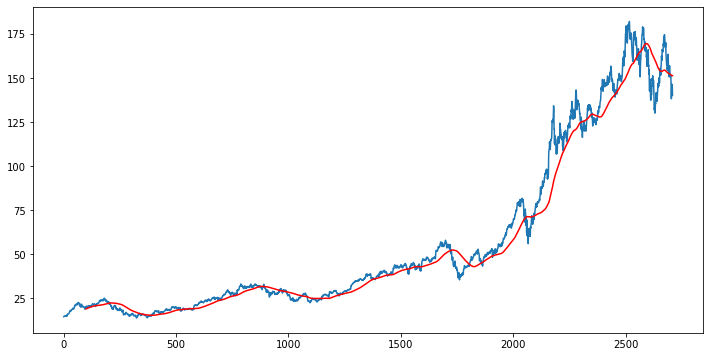

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2705    159.6774
2706    159.5466
2707    159.4229
2708    159.3013
2709    159.1368
Name: Close, Length: 2710, dtype: float64

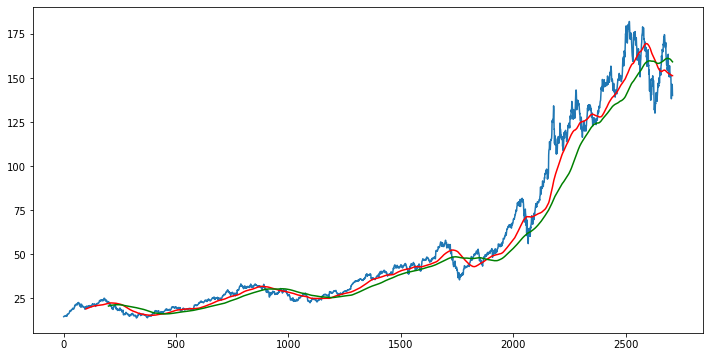

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200, 'green')


In [15]:
df.shape

(2710, 5)

In [16]:
#splitting data into training and testing       

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1896, 1)
(814, 1)


In [17]:
data_training.head() 


,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [18]:
data_testing.head()

,Close
1896,51.415001
1897,50.647499
1898,51.805000
1899,52.209999
1900,52.167500


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)  
data_training_array


array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.84762877],
       [0.84360105],
       [0.83707738]])

In [21]:
x_train = []                    
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [22]:
# ml model       
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential


In [23]:
model = Sequential() 

In [24]:
from keras.layers import Dense      
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [26]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
57/57 [==============================] - 17s 209ms/step - loss: 0.0419
Epoch 2/50
57/57 [==============================] - 12s 205ms/step - loss: 0.0089
Epoch 3/50
57/57 [==============================] - 12s 207ms/step - loss: 0.0076
Epoch 4/50
57/57 [==============================] - 12s 210ms/step - loss: 0.0071
Epoch 5/50
57/57 [==============================] - 12s 212ms/step - loss: 0.0061
Epoch 6/50
57/57 [==============================] - 12s 209ms/step - loss: 0.0055
Epoch 7/50
57/57 [==============================] - 12s 212ms/step - loss: 0.0056
Epoch 8/50
57/57 [==============================] - 12s 214ms/step - loss: 0.0054
Epoch 9/50
57/57 [==============================] - 13s 226ms/step - loss: 0.0053
Epoch 10/50
57/57 [==============================] - 14s 249ms/step - loss: 0.0050
Epoch 11/50
57/57 [==============================] - 13s 235ms/step - loss: 0.0051
Epoch 12/50
57/57 [==============================] - 13s 233ms/step - loss: 0.0044
Epoch 13/50
5

In [28]:
model.save('keras_model.h5') 

In [29]:
data_testing.head()  

,Close
1896,51.415001
1897,50.647499
1898,51.805000
1899,52.209999
1900,52.167500


In [30]:
past_100_days = data_training.tail(100)  

In [32]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\anant\AppData\Local\Temp\ipykernel_4440\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [33]:
final_df.head()

,Close
0,43.557499
1,43.582500
2,43.717499
3,43.287498
4,43.742500


In [34]:
input_data = scaler.fit_transform(final_df) 
input_data

array([[3.11407963e-03],
       [3.29409566e-03],
       [4.26611083e-03],
       [1.17002182e-03],
       [4.44612686e-03],
       [6.03018007e-03],
       [5.45415073e-03],
       [3.63610965e-03],
       [0.00000000e+00],
       [7.38027286e-04],
       [1.15203120e-02],
       [1.51384311e-02],
       [1.65784769e-02],
       [2.02145591e-02],
       [2.45166786e-02],
       [2.79367910e-02],
       [2.52547059e-02],
       [2.81887970e-02],
       [4.06631336e-02],
       [3.33909418e-02],
       [2.92328296e-02],
       [2.57227092e-02],
       [2.87468082e-02],
       [2.91968209e-02],
       [3.14108753e-02],
       [3.37329557e-02],
       [3.87370939e-02],
       [4.11311643e-02],
       [4.17431749e-02],
       [4.41012366e-02],
       [4.96814040e-02],
       [4.86013628e-02],
       [5.06174105e-02],
       [4.76113295e-02],
       [4.74673222e-02],
       [4.81153414e-02],
       [4.81513501e-02],
       [5.51355548e-02],
       [5.64495839e-02],
       [5.76556144e-02],


In [35]:
input_data.shape  

(914, 1)

In [36]:
x_test = []                   
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)  
print(x_test.shape)
print(y_test.shape)

(814, 100, 1)
(814,)


In [38]:
# making predictions              
 
y_predicted = model.predict(x_test)

26/26 [==============================] - 2s 69ms/step


In [39]:
y_predicted.shape 

(814, 1)

In [40]:
y_test  

array([0.05968968, 0.05416351, 0.06249775, 0.06541383, 0.06510782,
       0.06213775, 0.06343379, 0.06692586, 0.06530583, 0.07297403,
       0.0646758 , 0.0567376 , 0.03751305, 0.04410124, 0.04777333,
       0.05567555, 0.05128345, 0.0503654 , 0.06564784, 0.05445153,
       0.05263349, 0.06120172, 0.06813192, 0.06814991, 0.07225402,
       0.07193003, 0.05425352, 0.06118373, 0.0569896 , 0.05945566,
       0.06571983, 0.06523384, 0.05976167, 0.06604386, 0.07340606,
       0.07337005, 0.0750081 , 0.07956223, 0.09196457, 0.09106455,
       0.08325233, 0.08532238, 0.08676243, 0.09048854, 0.08723046,
       0.08141628, 0.08319834, 0.08132627, 0.08735645, 0.08530439,
       0.08337835, 0.0926486 , 0.09376462, 0.08363036, 0.08697845,
       0.09812074, 0.09821075, 0.09342261, 0.09815675, 0.1036649 ,
       0.11468123, 0.11406919, 0.11307918, 0.11136911, 0.11300717,
       0.11504123, 0.12242142, 0.12143142, 0.12722755, 0.12794759,
       0.13334774, 0.13779387, 0.12742556, 0.12737156, 0.13727

In [41]:
y_predicted 

array([[0.11147241],
       [0.11154376],
       [0.11160234],
       [0.11167169],
       [0.11179118],
       [0.11197808],
       [0.11222517],
       [0.11252302],
       [0.11287321],
       [0.11326709],
       [0.11372212],
       [0.11421749],
       [0.11468828],
       [0.11500739],
       [0.11509295],
       [0.11492246],
       [0.11451215],
       [0.11390451],
       [0.11315033],
       [0.11237261],
       [0.11163101],
       [0.11094509],
       [0.11036423],
       [0.10996123],
       [0.10978599],
       [0.10987657],
       [0.1102418 ],
       [0.11075844],
       [0.111348  ],
       [0.11193892],
       [0.11248025],
       [0.1129667 ],
       [0.1134041 ],
       [0.11377637],
       [0.11409411],
       [0.11440593],
       [0.11475477],
       [0.11517344],
       [0.11569789],
       [0.11640382],
       [0.11733922],
       [0.11847849],
       [0.11977448],
       [0.12117638],
       [0.12264748],
       [0.12413378],
       [0.12555242],
       [0.126

In [42]:
scaler.scale_ 

array([0.0072002])

In [43]:
scale_factor = 1/0.0072002        
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

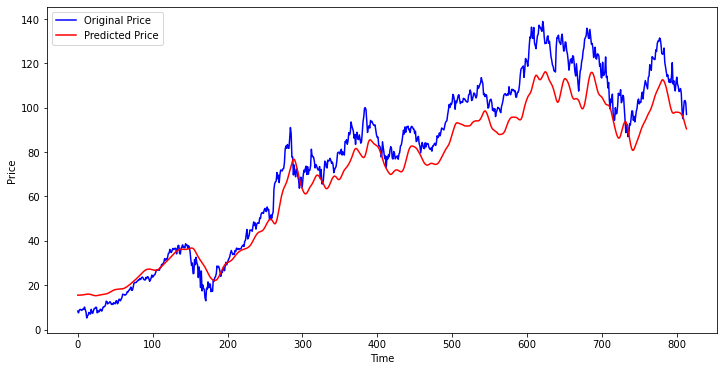

In [44]:
plt.figure(figsize=(12,6))                 
plt.plot(y_test , 'blue', label = 'Original Price')
plt.plot(y_predicted , 'red' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()